In [1]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(123)

# Generate synthetic data
n_patients = 1000
data = {
    "Patient_ID": np.arange(1, n_patients + 1),
    "Age": np.random.randint(18, 80, size=n_patients),
    "Gender": np.random.choice(["Male", "Female"], size=n_patients),
    "Biomarker_Level": np.random.normal(50, 10, size=n_patients),  # Mean = 50, Std = 10
    "Treatment_Group": np.random.choice(["Treatment", "Control"], size=n_patients),
    "Outcome": np.random.choice([0, 1], size=n_patients, p=[0.6, 0.4])  # 40% response rate
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv("adaptive_clinical_trial_data.csv", index=False)

print(df.head())

   Patient_ID  Age  Gender  Biomarker_Level Treatment_Group  Outcome
0           1   63    Male        66.032146       Treatment        0
1           2   20  Female        37.918065       Treatment        0
2           3   46    Male        53.301736       Treatment        0
3           4   52  Female        60.062807       Treatment        1
4           5   56  Female        38.907021       Treatment        0


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load the synthetic data
df = pd.read_csv("adaptive_clinical_trial_data.csv")

# Encode categorical variables
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})
df["Treatment_Group"] = df["Treatment_Group"].map({"Control": 0, "Treatment": 1})

# Define features and target
X = df[["Age", "Gender", "Biomarker_Level", "Treatment_Group"]]
y = df["Outcome"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=123)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.52
              precision    recall  f1-score   support

           0       0.60      0.63      0.61       122
           1       0.37      0.33      0.35        78

    accuracy                           0.52       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.51      0.52      0.51       200



In [3]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load the synthetic data
df = pd.read_csv("adaptive_clinical_trial_data.csv")

# Encode categorical variables
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})
df["Treatment_Group"] = df["Treatment_Group"].map({"Control": 0, "Treatment": 1})

# Define features and target
X = df[["Age", "Gender", "Biomarker_Level", "Treatment_Group"]]
y = df["Outcome"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Define models to compare
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=123),
    "XGBoost": XGBClassifier(random_state=123),
    "Logistic Regression": LogisticRegression(random_state=123)
}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

Training Random Forest...
Random Forest Accuracy: 0.52
              precision    recall  f1-score   support

           0       0.60      0.63      0.61       122
           1       0.37      0.33      0.35        78

    accuracy                           0.52       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.51      0.52      0.51       200

--------------------------------------------------
Training XGBoost...
XGBoost Accuracy: 0.52
              precision    recall  f1-score   support

           0       0.59      0.65      0.62       122
           1       0.36      0.31      0.33        78

    accuracy                           0.52       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.50      0.52      0.51       200

--------------------------------------------------
Training Logistic Regression...
Logistic Regression Accuracy: 0.62
              precision    recall  f1-score   support

           0       0.62 

In [4]:
!pip install optuna


[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [8]:
import optuna
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Ensure X_train, y_train are correctly formatted
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the Optuna objective function
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 300),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0)
    }

    model = XGBClassifier(**params, random_state=123, eval_metric="logloss")
    model.fit(X_train, y_train)

    y_pred = model.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)
    
    return accuracy

# Run the optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

# Print best parameters
print("Best Parameters:", study.best_params)


[I 2025-02-02 13:03:40,864] A new study created in memory with name: no-name-bdc902e7-67c3-4932-bfc1-0ecd2e54968c
[I 2025-02-02 13:03:41,052] Trial 0 finished with value: 0.525 and parameters: {'n_estimators': 246, 'max_depth': 5, 'learning_rate': 0.18274155332354186, 'subsample': 0.5220736580948706, 'colsample_bytree': 0.8315044132494396}. Best is trial 0 with value: 0.525.
[I 2025-02-02 13:03:41,161] Trial 1 finished with value: 0.525 and parameters: {'n_estimators': 254, 'max_depth': 5, 'learning_rate': 0.2268711799138841, 'subsample': 0.516320299863456, 'colsample_bytree': 0.5617974364723703}. Best is trial 0 with value: 0.525.
[I 2025-02-02 13:03:41,253] Trial 2 finished with value: 0.5 and parameters: {'n_estimators': 165, 'max_depth': 8, 'learning_rate': 0.158719539960697, 'subsample': 0.9386890752972077, 'colsample_bytree': 0.766257240651703}. Best is trial 0 with value: 0.525.
[I 2025-02-02 13:03:41,301] Trial 3 finished with value: 0.61875 and parameters: {'n_estimators': 55,

Best Parameters: {'n_estimators': 101, 'max_depth': 7, 'learning_rate': 0.010187230076645987, 'subsample': 0.6171154100654539, 'colsample_bytree': 0.9956511973114269}


In [9]:
#Train the Final Model with Best Parameters

best_params = study.best_params

best_model = XGBClassifier(**best_params, random_state=123, eval_metric="logloss")
best_model.fit(X_train, y_train)

# Evaluate on test set
y_pred = best_model.predict(X_test)
print("Test Set Accuracy:", accuracy_score(y_test, y_pred))



Test Set Accuracy: 0.605


Matplotlib is building the font cache; this may take a moment.


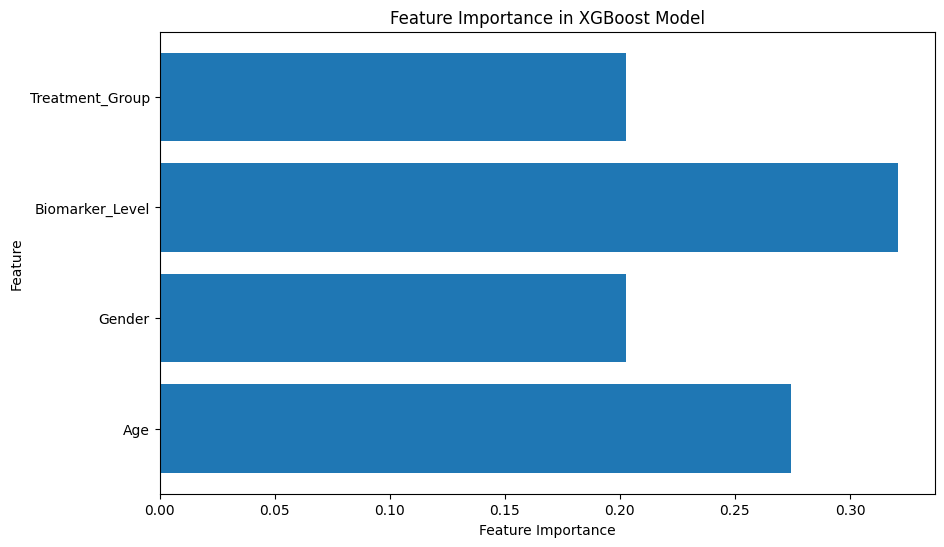

In [12]:
#Feature Importance Analysis

import matplotlib.pyplot as plt

# Get feature importances from the best model
feature_importances = best_model.feature_importances_
feature_names = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in XGBoost Model")
plt.show()

In [16]:
#Step 4: Cross-Validation for Robustness
#To ensure the model’s performance is consistent, we’ll use cross-validation.

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import numpy as np

# Define the XGBoost model with optimal hyperparameters
best_model = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42,
    eval_metric="logloss"
)

# Set up Stratified K-Fold Cross-Validation (5 folds)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store the accuracy scores for each fold
cv_scores = []

# Perform the cross-validation manually
for train_index, val_index in cv.split(X, y):
    # Split the data
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    # Train the model on the training data
    best_model.fit(X_train, y_train)
    
    # Make predictions on the validation data
    y_pred = best_model.predict(X_val)
    
    # Evaluate the model performance using accuracy score
    score = accuracy_score(y_val, y_pred)
    cv_scores.append(score)

# Print the cross-validation results
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))


Cross-Validation Accuracy Scores: [0.525, 0.49, 0.495, 0.53, 0.535]
Mean CV Accuracy: 0.515
Standard Deviation: 0.018708286933869722


In [17]:
#Step 5: Save the Best Model
import joblib

# Save the best model
joblib.dump(best_model, "best_xgboost_model.pkl")

# Load the model (for future use)
# loaded_model = joblib.load("best_xgboost_model.pkl")

['best_xgboost_model.pkl']